MNIST - Develop my first NN with Keras,Tensorflow

Tensorflow
1. Load Data.
2. function for displaying a training image



keras
1. Load Data.
2. function for displaying a training image
3. Define Model
4. Compile Model
5. Fit Model
6. Evaluate Model.
7. Tie It All Together.

In [81]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from random import randint
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K  
import keras

In [3]:
###tensorflow##



#load data

mnist = input_data.read_data_sets("mnist/",one_hot=True)

#define placeholder
x = tf.placeholder(tf.float32, shape=[None,784])
y = tf.placeholder(tf.float32,shape=[None,10])


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [4]:
#define weight, bias (softmax regression model)

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#start session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())


#regression model
y_ = tf.nn.softmax(tf.matmul(x,W) + b)


In [5]:
###train model###

#cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y* tf.log(y_), reduction_indices=[1]))

#gradient descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [52]:
# x None*784 == batch[0], y None*10 == batch[1]
#batch[n] = [00000001110....00000 784개 , 1000000000 10개] 


for i in range(1000):
  batch = mnist.train.next_batch(50)
  # input trainig sample 
  train_step.run(feed_dict={x: batch[0], y: batch[1]})


    
###evaluate model(predict accuracy)##

#tf.argmax = returning max index
#값은 true/false 불리언 형태로 반환
#[true, false, true,true]라면 1,0,1,1로 형변환되고 평균인 0.75가 예측 결과의 정확도가 된다.
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(y,1))


accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

###test### 
print(accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))


0.9176


In [59]:
def show_images(image, cls_true,cls_pred=None):
    image = image.reshape(28,28)
    plt.imshow(image,cmap="gray_r")
    plt.show()
    
    if cls_pred is None:
        print("real digit:",cls_true)
    else:
        print("real digit:",cls_true,"predicted digit",cls_pred)
                
    

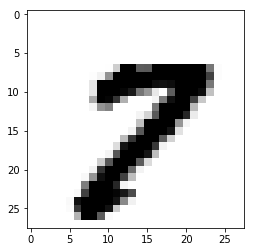

real digit: 7 predicted digit 7


In [58]:

rand = randint(0,10000)

mnist.test.cls = np.array([label.argmax() for label in mnist.test.labels])
#softmax한 y_c 최고값 = y_c
y_c = tf.argmax(y_ ,1)
#evaluation
pred = y_c.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})

show_images(mnist.test.images[rand],mnist.test.cls[rand],pred[rand])